<a href="https://colab.research.google.com/github/Chaithanyarajbulla/Myntra-Customer-Segmentation/blob/main/Customer_Segmentation_For_Fashion_E_Commerce_(Myntra).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # **Customer Segmentation for Fashion E-Commerce (Myntra)**

**Step 1 : Install & Import Libraries**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D

sns.set_style('whitegrid')

**Step 2 : Load Dataset**

In [17]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx"
df= pd.read_excel(url, sheet_name="Year 2010-2011")

**Step 3 : Basic Cleaning**

In [18]:
if 'Customer ID' in df.columns:
    df = df.dropna(subset=['Customer ID'])
    df['Customer ID'] = df['Customer ID'].astype(int)
df = df[df['Quantity'] > 0]
df['TotalPrice'] = df['Quantity'] * df['Price']
if not np.issubdtype(df['InvoiceDate'].dtype, np.datetime64):
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

**Step 4 : Feature Engineering (RFM + Month & Quarter + Simulated Product Categories)**

In [19]:
NOW = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('Customer ID').agg(
    Recency=('InvoiceDate', lambda x: (NOW - x.max()).days),
    Frequency=('Invoice', 'nunique'),
    Monetary=('TotalPrice', 'sum')
)
rfm = rfm[rfm['Monetary'] > 0]
rfm['LastPurchaseMonth'] = df.groupby('Customer ID')['InvoiceDate'].max().dt.month
rfm['LastPurchaseQuarter'] = df.groupby('Customer ID')['InvoiceDate'].max().dt.quarter

np.random.seed(42)
product_categories = ['Clothing', 'Footwear', 'Accessories', 'Ethnic Wear', 'Sportswear']
customer_categories = np.random.choice(product_categories, size=len(rfm))
rfm['PreferredCategory'] = customer_categories

**Step 5 : Scale features and KMeans clustering**

In [20]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])
K = 4
kmeans = KMeans(n_clusters=K, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

**Step 6 : Cluster Profiling**

In [21]:
cluster_summary = rfm.groupby('Cluster').agg(
    Recency_mean=('Recency', 'mean'),
    Frequency_mean=('Frequency', 'mean'),
    Monetary_mean=('Monetary', 'mean'),
    Count=('Monetary', 'count')
).round(2)
print('\nCluster Summary:\n', cluster_summary)


Cluster Summary:
          Recency_mean  Frequency_mean  Monetary_mean  Count
Cluster                                                    
0               15.67           22.05       12453.23    211
1              248.56            1.55         478.11   1062
2                7.38           82.69      127338.31     13
3               43.92            3.66        1350.15   3052


**Step 7 : Visualization - Multiple Plots**

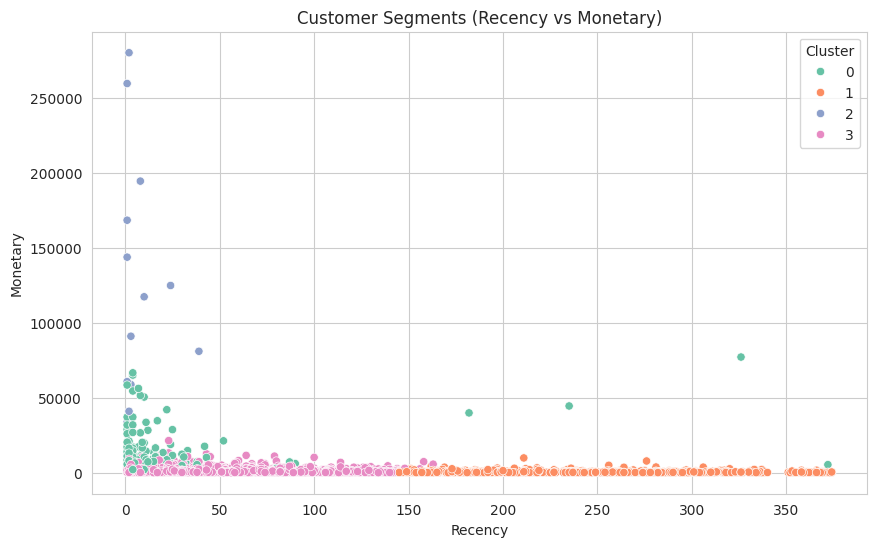

/tmp/ipython-input-1985412827.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary.index, y=cluster_summary['Count'], palette='Set3')


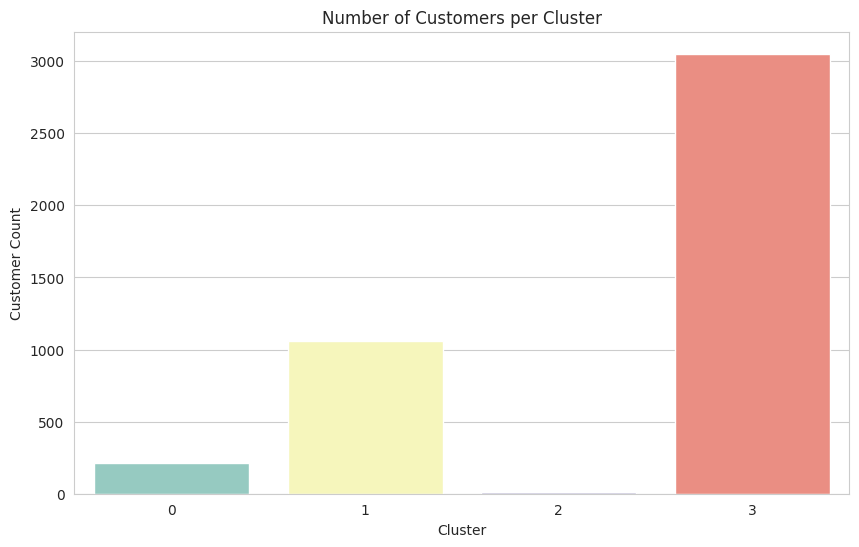

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Cluster'], palette='Set2')
plt.title('Customer Segments (Recency vs Monetary)')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=cluster_summary.index, y=cluster_summary['Count'], palette='Set3')
plt.title('Number of Customers per Cluster')
plt.ylabel('Customer Count')
plt.xlabel('Cluster')
plt.show()

**Boxplots Visualization for RFM + Month & Quarter**

/tmp/ipython-input-1748743409.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=rfm, palette='Set2')


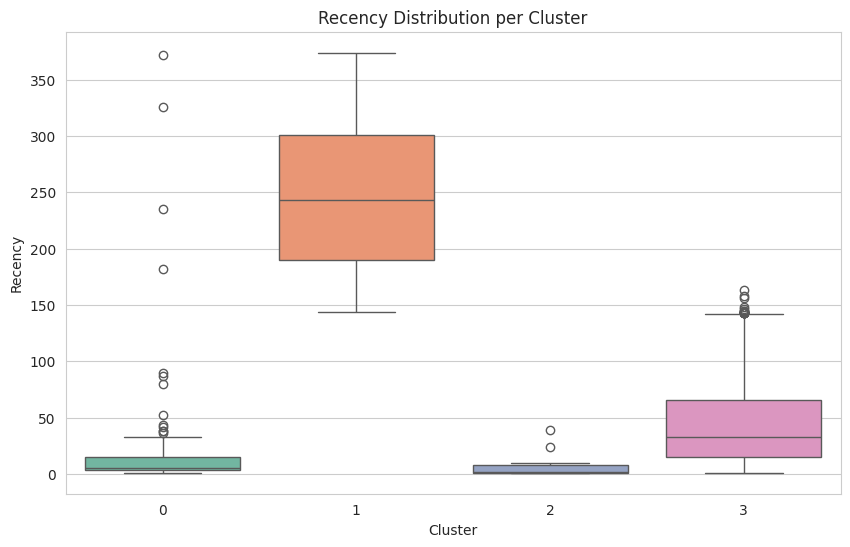

/tmp/ipython-input-1748743409.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=rfm, palette='Set2')


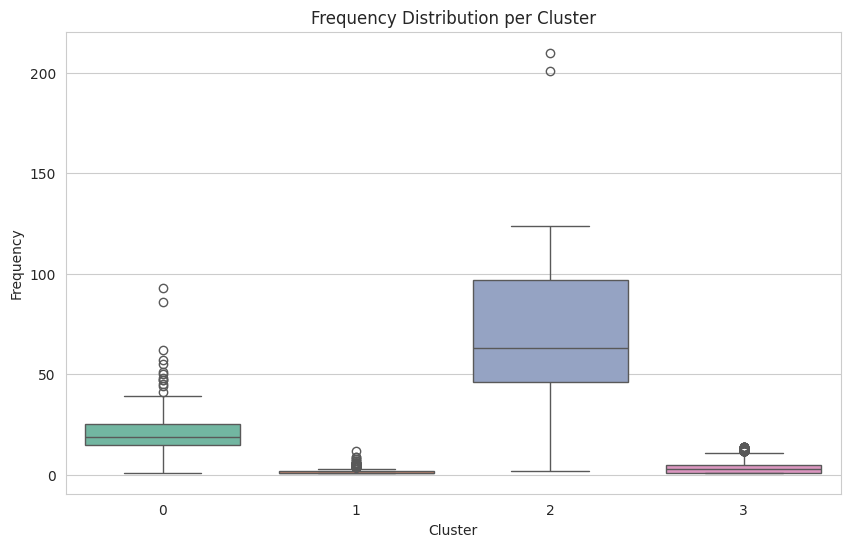

/tmp/ipython-input-1748743409.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=rfm, palette='Set2')


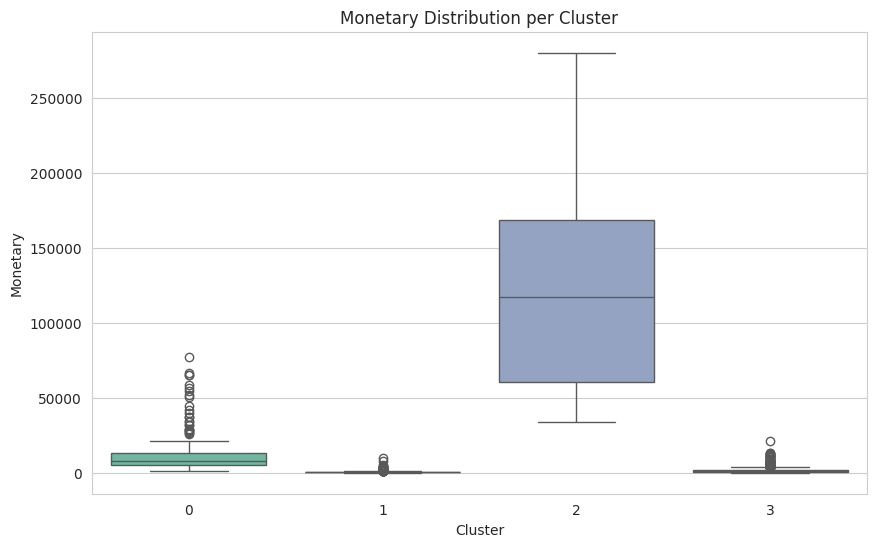

/tmp/ipython-input-1748743409.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=rfm, palette='Set2')


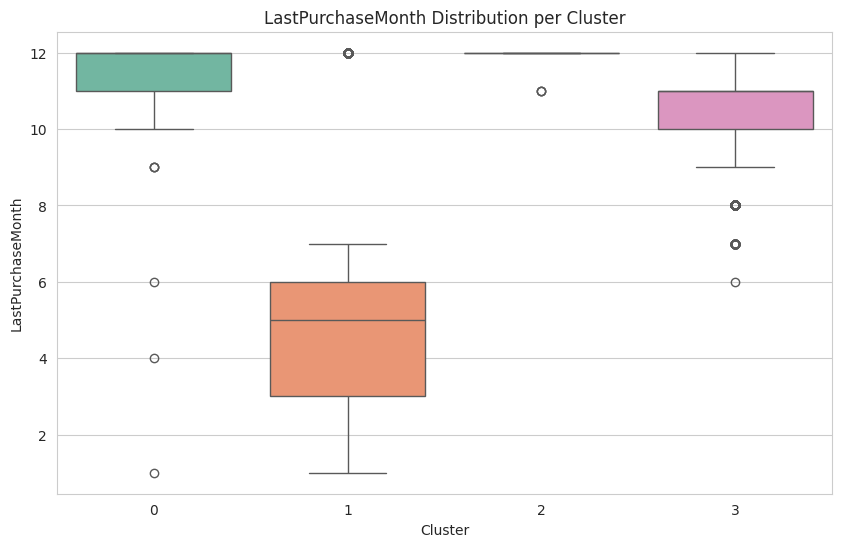

/tmp/ipython-input-1748743409.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=rfm, palette='Set2')


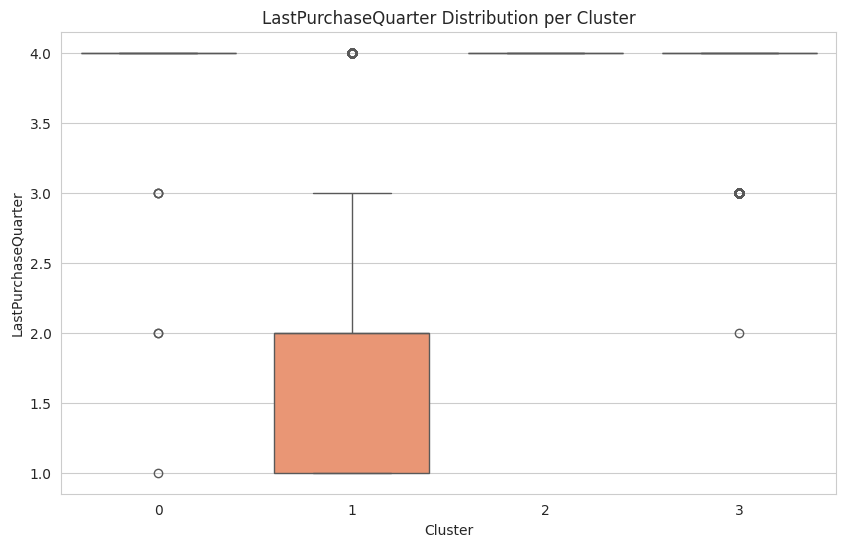

In [23]:
features = ['Recency', 'Frequency', 'Monetary', 'LastPurchaseMonth', 'LastPurchaseQuarter']
for feature in features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Cluster', y=feature, data=rfm, palette='Set2')
    plt.title(f'{feature} Distribution per Cluster')
    plt.show()

**Category Distribution Visualization per Cluster**

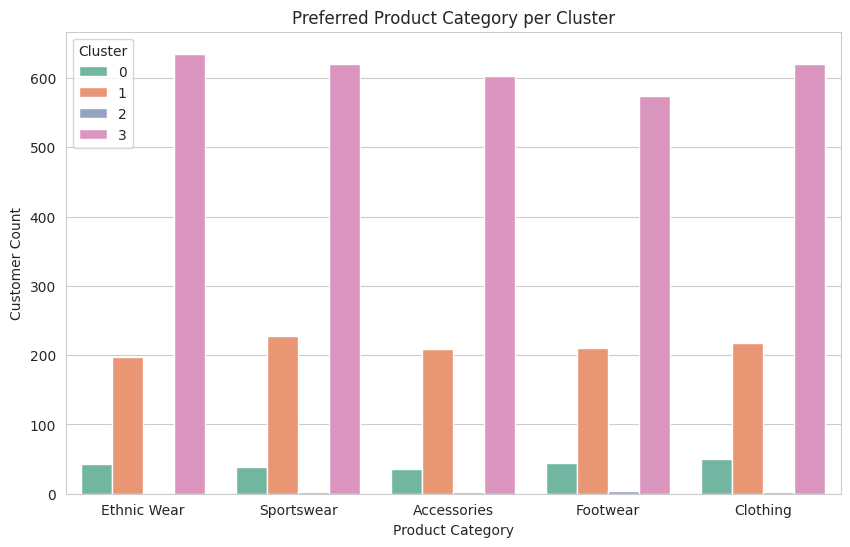

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='PreferredCategory', hue='Cluster', data=rfm, palette='Set2')
plt.title('Preferred Product Category per Cluster')
plt.xlabel('Product Category')
plt.ylabel('Customer Count')
plt.show()

**3D Scatter Plot for RFM**

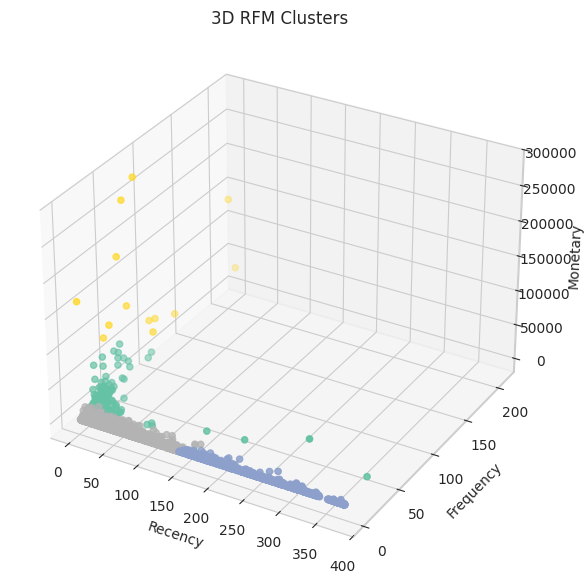

In [25]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='Set2')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D RFM Clusters')
plt.show()


**Heatmap of Cluster Averages**

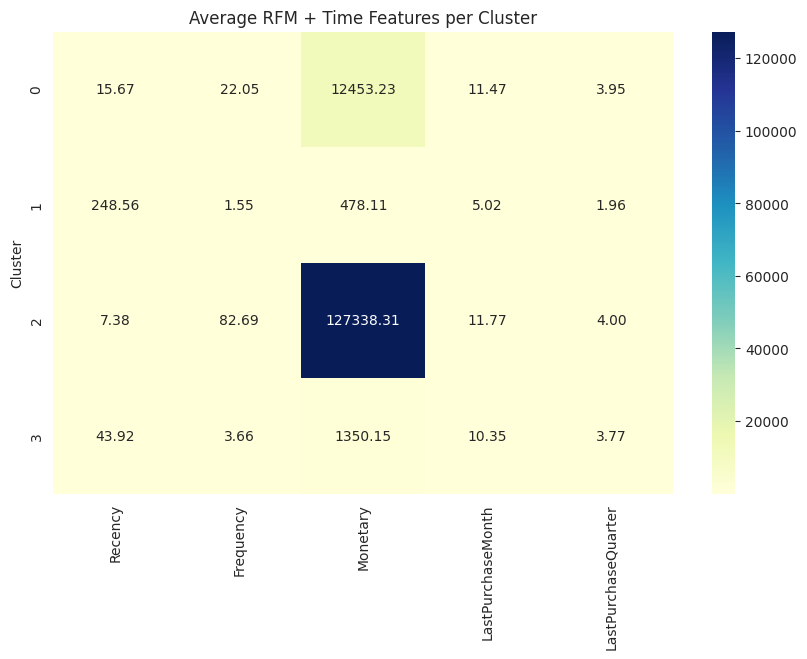

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(rfm.groupby('Cluster')[['Recency','Frequency','Monetary','LastPurchaseMonth','LastPurchaseQuarter']].mean(), annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Average RFM + Time Features per Cluster')
plt.show()

**Step 8 : Business Insights**

In [27]:
print('\nBusiness Insights per Cluster:')
for c in sorted(rfm['Cluster'].unique()):
    seg = rfm[rfm['Cluster']==c]
    print(f'\nCluster {c}: {len(seg)} customers')
    top_cat = seg['PreferredCategory'].value_counts().idxmax()
    print(f' - Most popular category: {top_cat}')
    if seg['Monetary'].mean() > rfm['Monetary'].mean():
        print(' - High spenders: Target premium collections, exclusive launches')
    elif seg['Frequency'].mean() > rfm['Frequency'].mean():
        print(' - Frequent buyers: Loyalty programs, Myntra Insider')
    elif seg['Recency'].mean() > rfm['Recency'].mean():
        print(' - Churn risk: Retarget with discounts & reminders')
    else:
        print(' - Occasional buyers: Seasonal campaigns')


Business Insights per Cluster:

Cluster 0: 211 customers
 - Most popular category: Clothing
 - High spenders: Target premium collections, exclusive launches

Cluster 1: 1062 customers
 - Most popular category: Sportswear
 - Churn risk: Retarget with discounts & reminders

Cluster 2: 13 customers
 - Most popular category: Footwear
 - High spenders: Target premium collections, exclusive launches

Cluster 3: 3052 customers
 - Most popular category: Ethnic Wear
 - Occasional buyers: Seasonal campaigns
